In [104]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Экстраполируем население Камеруна

## Возьмём известные данные о численности начеления Камеруна

| год, Y | численность населения, N |
|--------|--------------------------|
|  1950  |         4466000          |
|  1955  |         4901000          |
|  1960  |         5409000          |
|  1965  |         6049000          |
|  1970  |         6842000          |
|  1975  |         7838000          |
|  1980  |         9110000          |
|  1985  |        10519000          |
|  1990  |        12181000          |
|  1995  |        13940000          |
|  2000  |        15678000          |
|  2005  |        17554000          |
|  2010  |        19599000          |

[Источник](https://en.wikipedia.org/wiki/Demographics_of_Cameroon)

### Экстраполируем данные с помощью классической полиномиалной интерполяции методом Ньютона

In [105]:
# Загрузка данных

data = {
    1950 : 4466000,
    1955 : 4901000,
    1960 : 5409000,
    1965 : 6049000,
    1970 : 6842000,
    1975 : 7838000,
    1980 : 9110000,
    1985 : 10519000,
    1990 : 12181000,
    1995 : 13940000,
    2000 : 15678000,
    2005 : 17554000,
    2010 : 19599000,
}

START = 1950
STEP = 5

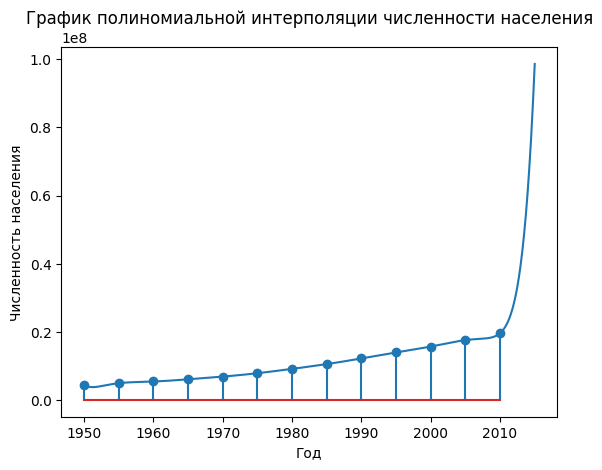

98651000.00000012


In [106]:
# Классическая полиномиальная интерполяция методом Ньютона

# Построение разделённых разностей

divided_diffs = {}

for j in range(len(data)):
    divided_diffs[f"{j}"] = data[START + j * STEP]

for i in range(2, len(data) + 1):
    for j in range(len(data) - i + 1):
        divided_diffs['_'.join([f'{j + k}' for k in range(i)])] = (divided_diffs['_'.join([f'{j + k + 1}' for k in range(i - 1)])] - divided_diffs['_'.join([f'{j + k}' for k in range(i - 1)])]) / (STEP * (i - 1))

# print(str(divided_diffs).replace(",", "\n"))

def newton_poly(n, divided_diffs, t_i, t):
    res = 0
    for i in range(n):
        tmp = divided_diffs['_'.join([f'{k}' for k in range(i + 1)])]
        for j in range(i):
            # print(t_i, j, flush=True)
            tmp *= t - t_i[j]
        res += tmp
    return res

def newton_poly_vec(n, divided_diffs, t_i, t):
    res = []
    for t_j in t:
        res.append(newton_poly(n, divided_diffs, t_i, t_j))
    return res

plt.stem(data.keys(), data.values())
plt.plot(np.linspace(1950, 2015, 1000), newton_poly_vec(len(data), divided_diffs, list(data.keys()), np.linspace(1950, 2015, 1000)))

plt.xlabel("Год")
plt.ylabel("Численность населения")
plt.title(f"График полиномиальной интерполяции численности населения")

plt.show()

print(newton_poly(len(data), divided_diffs, list(data.keys()), 2015))



### Экстраполируем данные сплайн-интерполяцией

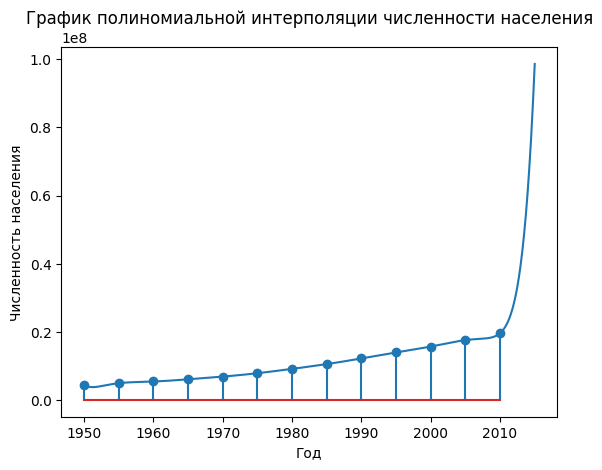

98650999.9999842


In [107]:
def l_k(x, x_k, i):
    res = 1
    for j in range(len(x_k)):
        if i == j:
            continue
        res *= (x - x_k[j]) / (x_k[i] - x_k[j])
    return res

def s_hm(x, x_k, y_k):
    res = 0
    for i in range(len(x_k)):
        res += y_k[i] * l_k(x, x_k, i)
    return res

def s_hm_vec(x, x_k, y_k):
    res = []
    for a in x:
        res.append(s_hm(a, x_k, y_k))
    return res

plt.stem(data.keys(), data.values())
plt.plot(np.linspace(1950, 2015, 1000), s_hm_vec(np.linspace(1950, 2015, 1000), list(data.keys()), list(data.values())))

plt.xlabel("Год")
plt.ylabel("Численность населения")
plt.title(f"График полиномиальной интерполяции численности населения")

plt.show()

print(s_hm(2015, list(data.keys()), list(data.values())))



### Экстраполируем данные методом наименьших квадратов выбрав экспоненциальную зависимость

$$ N = e^{a Y + b} $$
$$ \ln(N) = a Y + b $$
$$ \phi_1 = Y $$
$$ \phi_2 = 1 $$

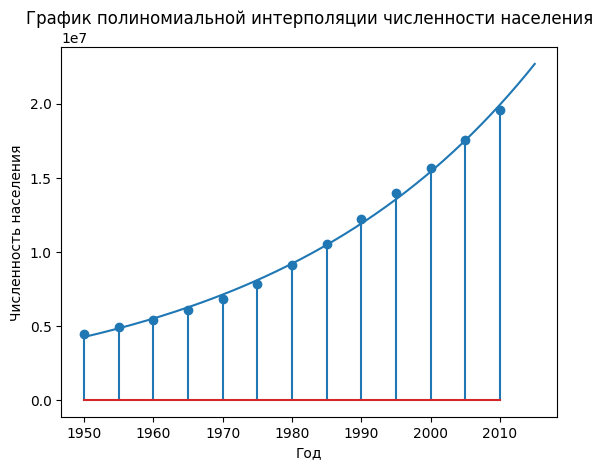

22676571.856689997


In [108]:
# Метод наименьших квадратов

def phi_1(Y):
    return Y

def phi_2(Y):
    return 1

def solve_linear_system(A, f):
    A_1 =np.array([
        np.array([A[1][1], -A[0][1]]),
        np.array([-A[1][0], A[0][0]]),
    ])
    
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    A_1 /= det
    
    return A_1 @ f

phi = [phi_1, phi_2]

x = np.array(list(data.keys()))
y = np.log(np.array(list(data.values())))

N = len(data)

A = np.array([
    np.zeros(2),
    np.zeros(2),
])

b = np.zeros(2)

for i in range(2):
    for j in range(2):
        A[i][j] = np.sum(np.array([phi[i](x[k]) * phi[j](x[k]) for k in range(N)]))
        
for i in range(2):
    b[i] = np.sum(np.array([y[k] * phi[i](x[k]) for k in range(N)]))
    
c = solve_linear_system(A, b)

plt.stem(data.keys(), data.values())
plt.plot(np.linspace(1950, 2015, 1000), np.exp(c[0] * np.linspace(1950, 2015, 1000) + c[1]))

plt.xlabel("Год")
plt.ylabel("Численность населения")
plt.title(f"График полиномиальной интерполяции численности населения")

plt.show()

print(np.exp(c[0] * 2015 + c[1]))


## Сравним полученный результат с данными из другого источника

Население Камеруна в 2015 году: 19958352 [Источник](https://en.wikipedia.org/wiki/List_of_countries_by_population_in_2015) 